In [162]:
import numpy as np # linear algebra
import pandas as pd # data processing
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from math import sqrt
from scipy.optimize import curve_fit



In [163]:
data = pd.read_csv('WED.csv')

In [164]:
data.head()

,Country,Stock_Market_Recovery,Lt_Yc,Mt_Yc,St_Yc,GDP_2019,Real_GDP_Growth,GDP_Deflator,Unemployment,Population,...,Income_Tax,Adjusted_Interest,GDP,Real_GDP,Household_Debt,Household_Debt_To_Real_GDP,Govt_Debt,Govt_Debt_To_Real_GDP,Current_Acct,Current_Acct_To_Real_GDP
0,US,-19.13,38.3,15.2,5.00,2.3,2.4,113.04,4.4,329.0,...,37.00,3.75,2.120000e+13,1.880000e+13,1.590000e+13,0.85006,2.270000e+13,1.20840,-4.880000e+13,-2.59992
1,China,-9.36,116.9,49.0,17.60,6.0,6.1,684.89,5.9,1400.0,...,45.00,0.15,1.420000e+13,2.070000e+12,7.720000e+12,3.72580,7.170000e+12,3.45869,1.420000e+13,6.84890
2,Japan,-19.83,14.4,1.2,2.10,1.7,0.9,105.40,2.4,126.0,...,55.95,4.10,5.110000e+12,4.850000e+12,2.990000e+12,0.61764,1.220000e+13,2.51168,1.790000e+13,3.68900
3,Germany,-24.55,24.0,4.8,-0.16,0.4,0.5,105.60,3.2,83.0,...,45.00,4.00,4.040000e+12,3.830000e+12,2.190000e+12,0.57341,2.420000e+12,0.63149,2.870000e+13,7.49760
4,India,-24.95,186.9,89.0,27.30,4.7,6.1,138.80,7.8,1312.0,...,35.88,0.40,2.800000e+12,2.020000e+12,3.360000e+11,0.16656,1.950000e+12,0.96633,-5.880000e+12,-2.91480


In [165]:
main_data = data[['Stock_Market_Recovery','Lt_Yc','Mt_Yc','St_Yc','GDP_2019','Real_GDP_Growth','Unemployment','Population','Inflation','Food_Inflation','Interest','Current_Acct_To_GDP','Gold_Tons','Govt_Debt_To_GDP','Household_Debt_To_GDP','Income_Tax','Adjusted_Interest','Real_GDP','Household_Debt_To_Real_GDP','Govt_Debt_To_Real_GDP','Current_Acct_To_Real_GDP']]
print(main_data.head())

   Stock_Market_Recovery  Lt_Yc  Mt_Yc  St_Yc  GDP_2019  Real_GDP_Growth  \
0                 -19.13   38.3   15.2   5.00       2.3              2.4   
1                  -9.36  116.9   49.0  17.60       6.0              6.1   
2                 -19.83   14.4    1.2   2.10       1.7              0.9   
3                 -24.55   24.0    4.8  -0.16       0.4              0.5   
4                 -24.95  186.9   89.0  27.30       4.7              6.1   

   Unemployment  Population  Inflation  Food_Inflation  ...  \
0           4.4       329.0       1.50            1.90  ...   
1           5.9      1400.0       4.30           18.30  ...   
2           2.4       126.0       0.40            1.40  ...   
3           3.2        83.0       1.40            3.60  ...   
4           7.8      1312.0       5.91            8.76  ...   

   Current_Acct_To_GDP  Gold_Tons  Govt_Debt_To_GDP  Household_Debt_To_GDP  \
0                 -2.3    8133.46            106.90                   75.2   
1       

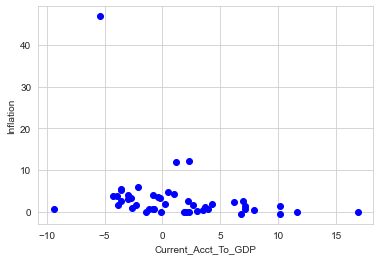

In [166]:
X = main_data[["Current_Acct_To_GDP", "Inflation"]]
# Visualize data point
plt.scatter(X["Current_Acct_To_GDP"], X["Inflation"], c="blue")
plt.xlabel("Current_Acct_To_GDP")
plt.ylabel("Inflation")
plt.show()

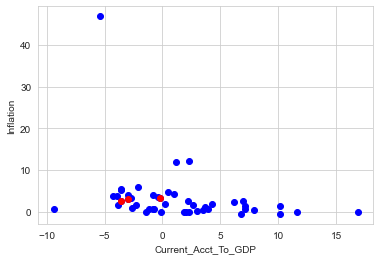

In [167]:
# step 1 and 2

# number of centriod
K=3

# select random observation as a centriod 
Centroids = (X.sample(n=K))
plt.scatter(X["Current_Acct_To_GDP"], X["Inflation"], c="blue")
plt.scatter(Centroids["Current_Acct_To_GDP"], Centroids["Inflation"], c="red")
plt.xlabel("Current_Acct_To_GDP")
plt.ylabel("Inflation")
plt.show()

In [168]:
Centroids

,Current_Acct_To_GDP,Inflation
15,-3.0,2.96
44,-3.6,2.50
14,-0.2,3.25


In [169]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1, row_c in Centroids.iterrows():
        ED=[]
        for index2, row_d in XD.iterrows():
            d1 = (row_c["Current_Acct_To_GDP"]-row_d["Current_Acct_To_GDP"])**2
            d2 = (row_c["Inflation"]-row_d["Inflation"])**2
            d = sqrt(d1+d2)
            ED.append(d)
        X[i] = ED
        i = i+1
        
        C = []
    for index, row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos = i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Inflation", "Current_Acct_To_GDP"]]
    if j == 0:
        diff = 1
        j = j+1
    else:
        diff = (Centroids_new['Inflation'] - Centroids['Inflation']).sum() + (Centroids_new['Current_Acct_To_GDP'] - Centroids['Current_Acct_To_GDP']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Inflation","Current_Acct_To_GDP"]]

5.03964090909091
7.851733834586466
12.2656328320802
19.481025641025642
0.22651334532913425
0.0


<ipython-input-169-e8a21517c759>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = ED
<ipython-input-169-e8a21517c759>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Cluster"]=C


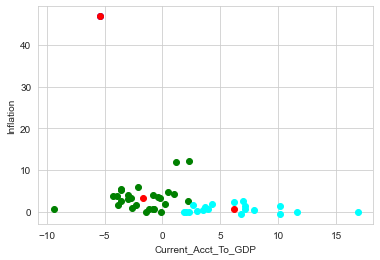

In [170]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Current_Acct_To_GDP"],data["Inflation"],c=color[k])
plt.scatter(Centroids["Current_Acct_To_GDP"],Centroids["Inflation"],c='red')
plt.xlabel('Current_Acct_To_GDP')
plt.ylabel('Inflation')
plt.show()

# Fitting the housing data

In [77]:
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [144]:
housingdf = pd.read_csv('housing.csv')
df.head().T

,0,1,2,3,4
longitude,-122.23,-122.22,-122.24,-122.25,-122.25
latitude,37.88,37.86,37.85,37.85,37.85
housing_median_age,41,21,52,52,52
total_rooms,880,7099,1467,1274,1627
total_bedrooms,129,1106,190,235,280
population,322,2401,496,558,565
households,126,1138,177,219,259
median_income,8.3252,8.3014,7.2574,5.6431,3.8462
median_house_value,452600,358500,352100,341300,342200
ocean_proximity,near_bay,near_bay,near_bay,near_bay,near_bay


In [145]:
housingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [146]:
housingdf['ocean_proximity'].value_counts()


<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [147]:
housingdf['ocean_proximity'] = housingdf['ocean_proximity'].str.lower().replace('[^0-9a-zA-Z]+','_',regex=True)


In [129]:
encodings = pd.get_dummies(df['ocean_proximity'], prefix='proximity')
df = pd.concat([df, encodings], axis=1)
df.sample(5).T

,711,9267,2896,18058,5857
longitude,-122.08,-120.13,-118.97,-122.01,-118.33
latitude,37.68,36.87,35.37,37.27,34.19
housing_median_age,26,32,52,27,45
total_rooms,2607,2089,425,3340,1505
total_bedrooms,682,468,119,451,347
population,1401,1765,380,1220,799
households,607,427,97,447,319
median_income,2.6563,2.234,1.4125,8.8178,3.138
median_house_value,184100,61700,42500,500001,217000
ocean_proximity,near_bay,inland,inland,_1h_ocean,_1h_ocean


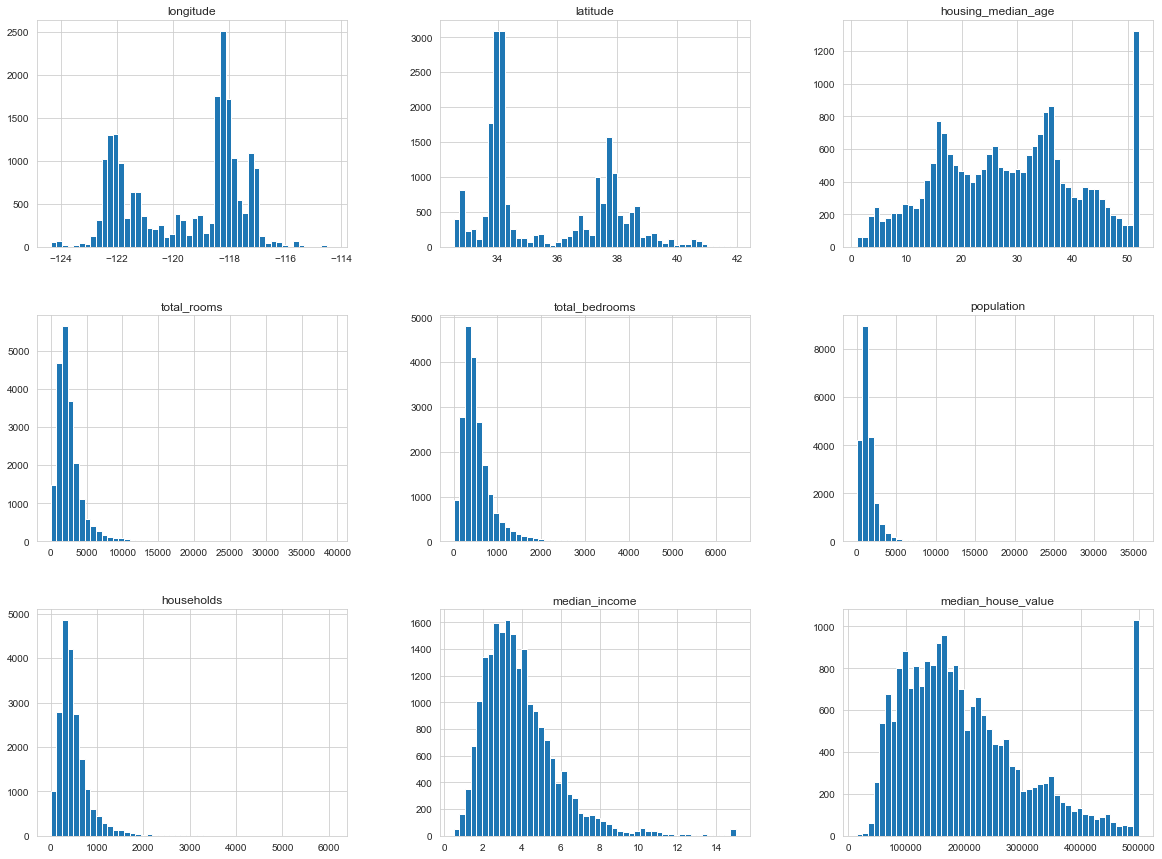

In [148]:
housingdf.hist(bins=50, figsize=(20,15))
plt.show()

In [149]:
housingdf.describe().T


,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


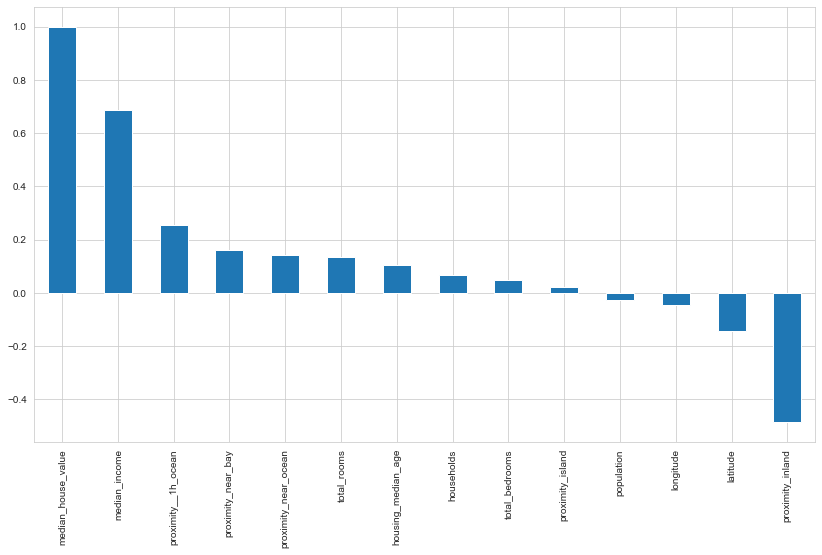

In [132]:
plt.figure(figsize=(14,8))
bars = df.corr()['median_house_value'].sort_values(ascending=False).plot(kind='bar')

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

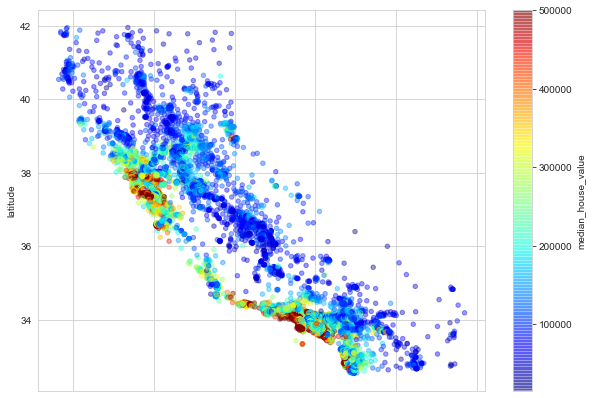

In [150]:
housingdf.plot(
    x='longitude', y='latitude',
    kind='scatter', figsize=(10,7),
    alpha=.4,
    c='median_house_value', cmap=plt.get_cmap('jet'), colorbar=True
)

In [151]:
housingdf.isnull().sum()


longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [152]:
housingdf = df.fillna(0)


In [153]:
X = housingdf.drop(['median_house_value','ocean_proximity'], axis=1)
y = df['median_house_value']

In [154]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [155]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [156]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [157]:
y_pred = model.predict(X_test)


In [158]:
y_pred

array([243591.52670655,  94412.65974219, 247816.45221937, ...,
       192065.52552894, 177775.96092446, 167446.90547246])

In [159]:
print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred))) 


RMSE:  69076.58434035334


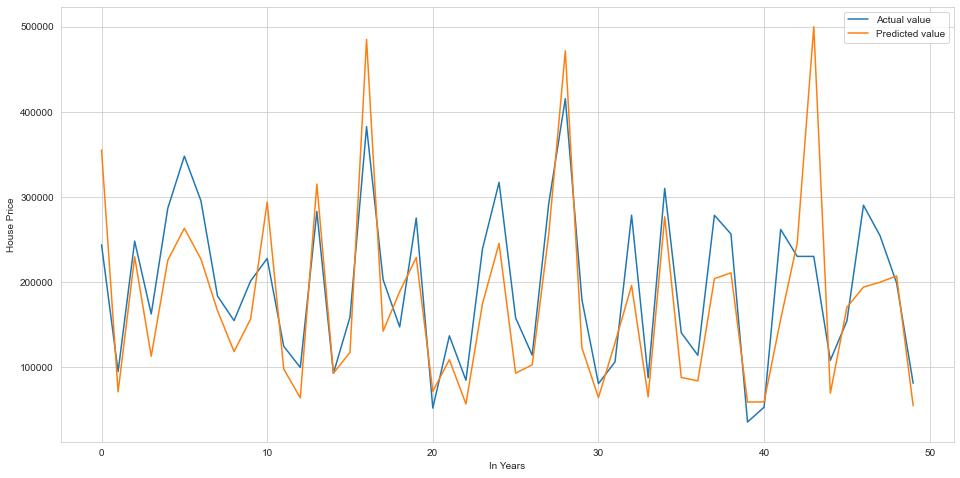

In [171]:
test = pd.DataFrame({'Predicted value':y_pred, 'Actual value':y_test})
fig= plt.figure(figsize=(16,8))
test = test.reset_index()
test = test.drop(['index'],axis=1)
plt.xlabel('In Years')
plt.ylabel('House Price')
plt.plot(test[:50])
plt.legend(['Actual value','Predicted value'])